# **Exploratory Data Analysis**

## Import Libraries

In [229]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset Description

The dataset is taken from Kaggle's Playground Prediction Competition ["New York City Taxi Trip Duration"](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview).

The competition dataset is based on the [2016 NYC Yellow Cab trip record data](https://cloud.google.com/bigquery/public-data) made available in Big Query on Google Cloud Platform. The data was originally published by the [NYC Taxi and Limousine Commission (TLC)](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

**Data fields**
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

## Project Objective
Machine learning model will be predicting taxi trip durations based on individual trip attributes.

## Load Dataset

In [304]:
df = pd.read_csv('train.csv')
# df = df.sample(frac=0.25, random_state=10)

## Explore Data

In [231]:
df.shape

(1458644, 11)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [233]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [234]:
df['dropoff_datetime'].min()

'2016-01-01 00:03:31'

In [235]:
df['dropoff_datetime'].max()

'2016-07-01 23:02:03'

In [236]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [237]:
(df.isnull().sum()/(len(df)))*100

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

#### No missing data in this dataset.
#### If there are any missing data, first identify types of missing data (MCAR, MAR, MNAR) and then approach the problem with appropriate techniques

In [238]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [239]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


## Preliminary Feature Engineering

### Create new features from pickup_datetime and dropoff_datetime

In [240]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


#### Extract hour, week day and month from pickup datetime in order to engineer a set of new features from available datetime columns.
#### Only pickup columns will be used since for the majority of rows pickup columns will be the same as dropoff.
#### Probably an hour column needs to be investigated closely, let's leave it for now and revisit in the next iteration of feature engineering.

In [242]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_month'] = df['pickup_datetime'].dt.month

In [243]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_weekday,pickup_hour,pickup_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,13,3


### Calculate Haversine great-circle distance

In [244]:
def calculate_haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine great-circle distance between two points
    on a sphere given their longitudes and latitudes.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])    
    dlon = lon2 - lon1
    dlat = lat2 - lat1   
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    haversine_distance = 6378.137 * c
    
    return haversine_distance

In [245]:
df['haversine_distance'] = calculate_haversine_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_weekday,pickup_hour,pickup_month,haversine_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,3,1.500199
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,0,6,1.807530
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,11,1,6.392251
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,19,4,1.487163
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,13,3,1.189920


### Calculate Manhattan distance

In [246]:
def calculate_manhattan_distance(lat1, lon1, lat2, lon2):
    """
    Calculates Manhattan distance between two points using their latitude and longitude.
    """
    a = calculate_haversine_distance(lat1, lon1, lat1, lon2)
    b = calculate_haversine_distance(lat1, lon1, lat2, lon1)
    manhattan_distance = a + b
    
    return manhattan_distance

In [247]:
df['manhattan_distance'] = df.apply(lambda row: calculate_manhattan_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,3,1.500199,1.737377
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,0,6,1.807530,2.433229
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,11,1,6.392251,8.212765
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,19,4,1.487163,1.663192
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,13,3,1.189920,1.200800


### Convert latitude and longitude to Polar coordinates

In [248]:
def convert_to_polar_coordinates(lat, lon):
    """
    Converts latitude and longitude to polar coordinates.
    """
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)

    # Convert to polar coordinates
    r = math.sqrt(lat_rad**2 + lon_rad**2)
    phi = math.atan2(lon_rad, lat_rad)

    return r, phi

In [249]:
df['pickup_r'], df['pickup_phi'] = zip(*df.apply(lambda row: convert_to_polar_coordinates(row['pickup_latitude'], row['pickup_longitude']), axis=1))
df['dropoff_r'], df['dropoff_phi'] = zip(*df.apply(lambda row: convert_to_polar_coordinates(row['dropoff_latitude'], row['dropoff_longitude']), axis=1))

In [250]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,17,3,1.500199,1.737377,1.474301,-1.067147,1.474013,-1.067071
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,0,6,1.807530,2.433229,1.474027,-1.067441,1.474256,-1.067627
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,11,1,6.392251,8.212765,1.474219,-1.067170,1.474168,-1.067879
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,19,4,1.487163,1.663192,1.474323,-1.067803,1.474246,-1.067953
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,13,3,1.189920,1.200800,1.474374,-1.066833,1.474282,-1.066943


### Calculate bearing

In [251]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculates bearing between two points using their latitude and longitude.
    """
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Calculate the difference in longitudes
    dlon = lon2 - lon1

    # Calculate the bearing angle
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(dlon))
    initial_bearing = np.arctan2(x, y)

    # Normalize the initial bearing to 0° ... 360°
    initial_bearing = np.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

In [252]:
df['bearing'] = df.apply(lambda row: calculate_bearing(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,17,3,1.500199,1.737377,1.474301,-1.067147,1.474013,-1.067071,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,6,1.807530,2.433229,1.474027,-1.067441,1.474256,-1.067627,242.846232
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,11,1,6.392251,8.212765,1.474219,-1.067170,1.474168,-1.067879,200.319835
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,19,4,1.487163,1.663192,1.474323,-1.067803,1.474246,-1.067953,187.262300
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,13,3,1.189920,1.200800,1.474374,-1.066833,1.474282,-1.066943,179.473585


## EDA Univariate Analysis

### Vendor ID

In [253]:
df['vendor_id'].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

<Axes: xlabel='vendor_id', ylabel='percent'>

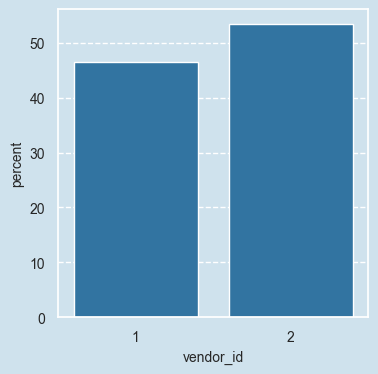

In [254]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(4, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x='vendor_id', stat="percent", color="#1f77b4")

#### - Both vendors are almost equally represented in the dataset, with vendor 2 having slightly more trips than vendor 1.

### Passenger Count

In [255]:
df['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

#### - There are 19 definite outliers with 0 passengers.
#### - Only 1 trip recorded with 8 and 9 passengers, and 3 trips with 7 passengers, we can assume that these are outliers.

In [256]:
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] < 7]

<Axes: xlabel='passenger_count', ylabel='percent'>

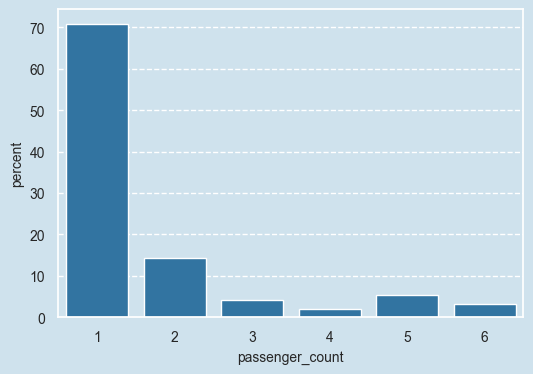

In [257]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(6, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x='passenger_count', stat="percent", color="#1f77b4")

#### - As expected, the highest number of trips are with 1 passenger.
#### - Interestingly, 5 passengers have more trips than 3 and 4. Investigate later.

### Latitude and Longitude

#### The original dataset had a lot of outliers in lat and lon, I noticed this when I plotted pickup and dropoff locations on a scatterplot and compared with the lat and lon of New York city.
#### Threfore, the lat and lon columns were filtered to approx. boundaries of New York city for this task. In order to improve these features, a farther more thorough filtering needs to be implemented.

In [258]:
df = df[df['pickup_longitude'] <= -73.75]
df = df[df['pickup_longitude'] >= -74.03]
df = df[df['pickup_latitude'] <= 40.85]
df = df[df['pickup_latitude'] >= 40.63]
df = df[df['dropoff_longitude'] <= -73.75]
df = df[df['dropoff_longitude'] >= -74.03]
df = df[df['dropoff_latitude'] <= 40.85]
df = df[df['dropoff_latitude'] >= 40.63]

In [259]:
df.shape

(1439130, 22)

In [260]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)

Text(0.5, 1.0, 'Pickup and dropoff locations')

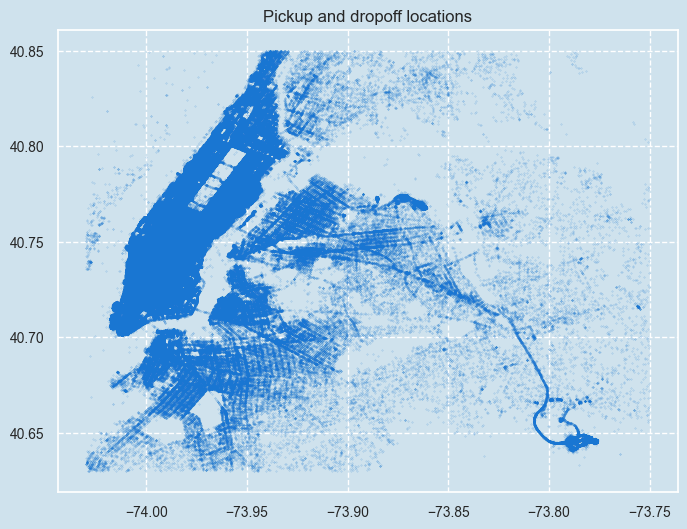

In [261]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 6), 'grid.linestyle': '--'})

plt.plot(longitude, latitude, '.', alpha=.4, markersize=.5, color="#1976d2")
plt.title('Pickup and dropoff locations')

#### - Clearly the majority of trips are taken in Manhattan area.
#### - We can see trips to two major NYC airports, JFK and LaGuardia.

Text(0.5, 1.0, 'Dropoff Locations')

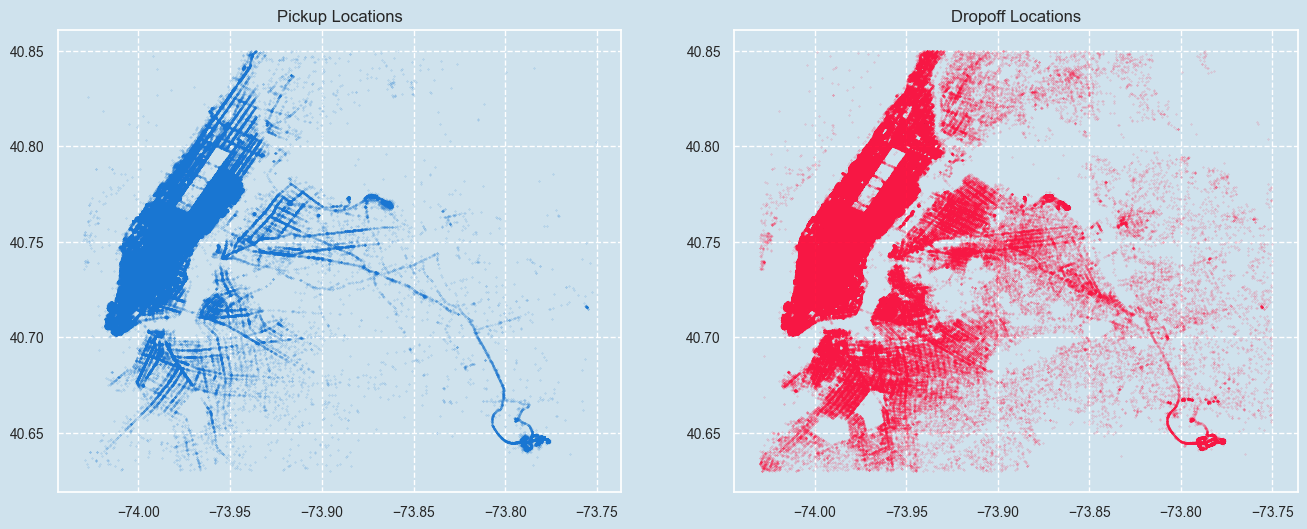

In [262]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 6), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(df['pickup_longitude'], df['pickup_latitude'], '.', alpha=.4, markersize=.5, color="#1976d2")
plt.title('Pickup Locations')

plt.subplot(1, 2, 2)
plt.plot(df['dropoff_longitude'], df['dropoff_latitude'], '.', alpha=.4, markersize=.5, color="#ff1744")
plt.title('Dropoff Locations')

#### - Pickup locations are mostly located in Manhattan area and major streets, which is expected.
#### - Dropoff locations are more spreaded in smaller streets and suburban areas.

### Store and Forward Flag

In [263]:
df['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994527
Y    0.005473
Name: proportion, dtype: float64

#### - About 0.5% of trips were stored before forwarding.
#### - Heavily unbalanced feature, not suitable for modelling.

### Trips by Weekday

<Axes: xlabel='pickup_day', ylabel='percent'>

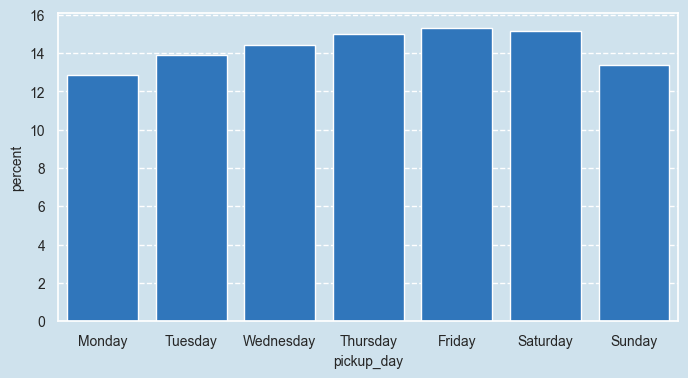

In [264]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 4), 'grid.linestyle': '--'})

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x=df['pickup_day'], stat="percent", order=order, color="#1976d2")

#### - Number of trips are gradually increasing starting from Monday, culminating on Friday with just above 15%.
#### - Saturday is almost as busy as Friday, while Sunday has number of trips dropped to almost Monday levels. 

### Trips by Hour

<Axes: xlabel='pickup_hour', ylabel='percent'>

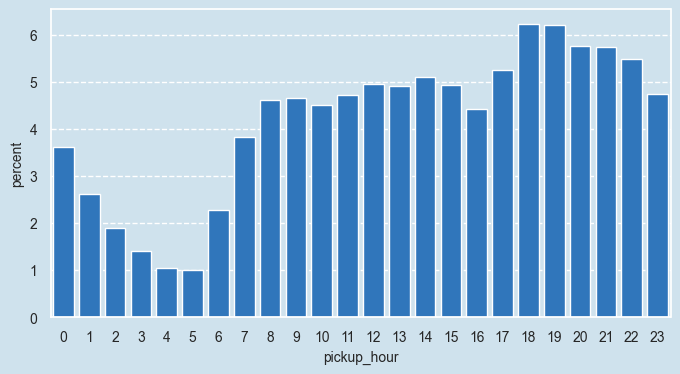

In [265]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x=df['pickup_hour'], stat="percent", color="#1976d2")

#### - As expected, the least busiest hours are 4 and 5.
#### - Number of trips is increasing gradually starting from 6, roughly plateauing between 8 and 17.
#### - Starting from 17 the number of trips are increasing with the peak at 18 and 19. This is expected as people are travelling from offices back to their homes.

### Trips by Month

<Axes: xlabel='pickup_month', ylabel='percent'>

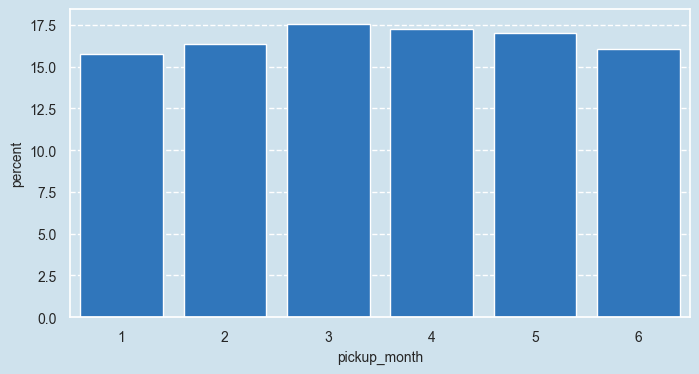

In [266]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(8, 4), 'grid.linestyle': '--'})

sns.countplot(data=df, x=df['pickup_month'], stat="percent", color="#1976d2")

#### - This dataset has only 6 months of data, from January to June. Would be nice to have a full year - possible improvement.
#### - Number of trips are almost evenly distributed, with March and April having the highest number of trips - interesting to investigate why?

### Trip Duration - Target Variable

In [267]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
726971           1
555237           1
404610           1
610159           1
346102           1
Name: trip_duration, Length: 1439130, dtype: int64

#### - More than 86K sec (approx. 24 hours) are probably outliers. Possibly investigate in the next iteration of model improvements.
#### - 1 sec trips are probably had some technical glitches or cancelled trips. 
#### - Farther investigation revealed that there are some trips with 1 sec duration, but actually having different lat and log meaning that taxi was moved.
#### - There are clear indicators that there are outliers in this variable that needs to be investigated more thoroughly.
#### - For the first iteration of model, a z-score is used to identify and remove outliers.

In [268]:
df['trip_duration'].mean() / 60

15.769938504513142

<Axes: xlabel='trip_duration'>

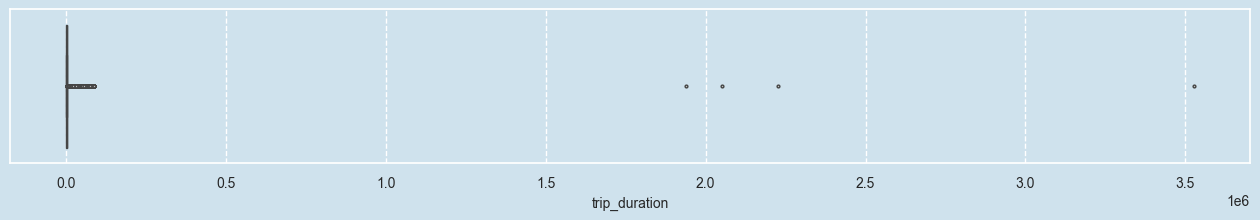

In [269]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 2), 'grid.linestyle': '--'})

sns.boxplot(x=df["trip_duration"], flierprops=dict(markerfacecolor='0.75', markersize=2), color="#1976d2")

In [270]:
df['trip_duration_zscore'] = (df['trip_duration'] - df['trip_duration'].mean())/df['trip_duration'].std(ddof=0)
df.sort_values(by=['trip_duration_zscore'], ascending=False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing,trip_duration_zscore
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,...,22,2,19.922955,27.722957,1.470265,-1.067251,1.474092,-1.067308,304.641003,671.331806
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,...,6,1,1.636959,1.774151,1.474110,-1.067422,1.474013,-1.067583,185.030076,424.025301
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,...,22,2,5.989189,8.072751,1.473101,-1.067140,1.474273,-1.067244,297.381354,390.122180
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,...,0,1,20.171235,28.538433,1.470310,-1.067337,1.473957,-1.066948,315.683698,369.204902
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,...,23,2,20.665848,28.927971,1.470395,-1.067352,1.474332,-1.067326,306.688034,16.271496


[(-3.0, 3.0)]

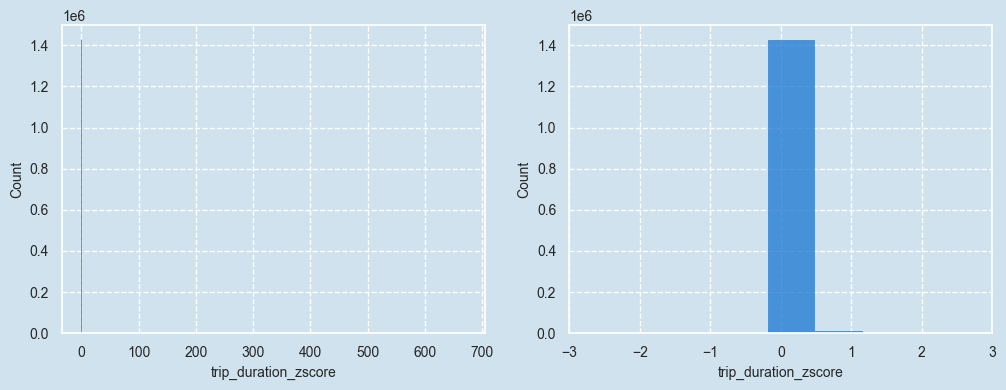

In [271]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(12, 4), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration_zscore'], kde=False, bins=1000, color="#1976d2")

plt.subplot(1, 2, 2)
g = sns.histplot(df['trip_duration_zscore'], kde=False, bins=1000, color="#1976d2")
g.set(xlim=(-3, 3))

#### To train model v0 I will remove rows where trip duration more than 2 standard deviations from the mean.
#### But target variavle outlier handling step should be revisited in the next iterations of model improvements.

In [272]:
df = df[df['trip_duration_zscore'] <= 2]

In [273]:
df.shape

(1437076, 23)

In [274]:
df.drop(['trip_duration_zscore'], axis=1, inplace=True)

<Axes: xlabel='trip_duration'>

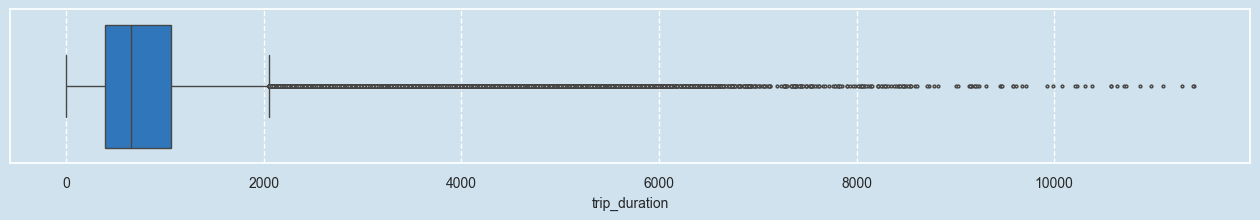

In [275]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 2), 'grid.linestyle': '--'})

sns.boxplot(x=df["trip_duration"], flierprops=dict(markerfacecolor='0.75', markersize=2), color="#1976d2")

In [276]:
# df['trip_duration_log'] = np.log(df['trip_duration'])

<Axes: xlabel='trip_duration', ylabel='Count'>

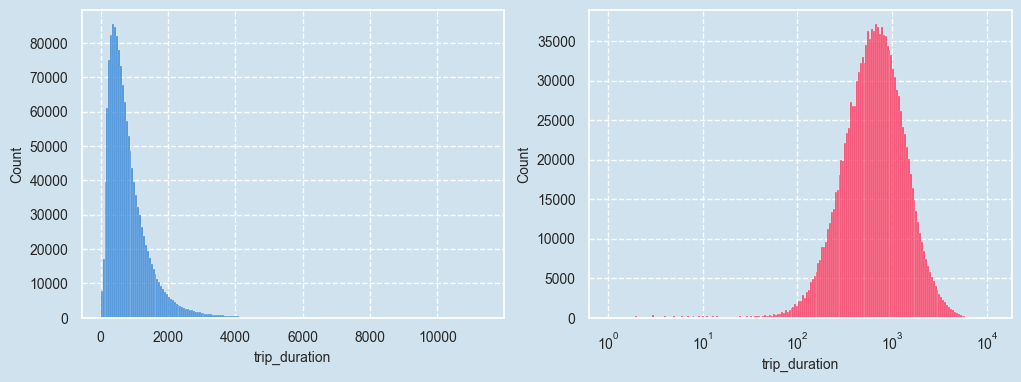

In [277]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(12, 4), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'], kde=False, bins=200, color="#1976d2")

plt.subplot(1, 2, 2)
sns.histplot(df['trip_duration'], kde=False, bins=200, log_scale=True, color="#ff1744")

#### Possibly consider using log transformation of target variable.

In [278]:
df[df['trip_duration'] < 5].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,N,...,5,12,5,0.002123,0.002123,1.470243,-1.067241,1.470243,-1.067241,180.000000
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,...,3,13,6,0.703852,0.993707,1.471503,-1.066800,1.471378,-1.066817,138.321912
1960,id0508736,1,2016-03-30 08:05:38,2016-03-30 08:05:41,1,-73.964096,40.777172,-73.964088,40.777157,N,...,2,8,3,0.001816,0.002342,1.474102,-1.066948,1.474102,-1.066948,159.261943
6777,id2891134,1,2016-05-16 08:20:40,2016-05-16 08:20:42,1,-73.963028,40.774895,-73.963020,40.774891,N,...,0,8,5,0.000771,0.001068,1.474067,-1.066965,1.474067,-1.066965,123.435049
7916,id1081617,2,2016-03-17 17:50:40,2016-03-17 17:50:44,3,-73.978615,40.745125,-73.978340,40.745457,N,...,3,17,3,0.043606,0.060109,1.474054,-1.067363,1.474053,-1.067358,32.087406


In [279]:
df[(df['pickup_longitude'] == df['dropoff_longitude']) & (df['pickup_latitude'] == df['dropoff_latitude'])].shape[0]

5413

In [280]:
df.shape

(1437076, 22)

In [281]:
df = df[(df['pickup_longitude'] != df['dropoff_longitude']) & (df['pickup_latitude'] != df['dropoff_latitude'])]
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,17,3,1.500199,1.737377,1.474301,-1.067147,1.474013,-1.067071,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,6,1.807530,2.433229,1.474027,-1.067441,1.474256,-1.067627,242.846232
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,11,1,6.392251,8.212765,1.474219,-1.067170,1.474168,-1.067879,200.319835
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,19,4,1.487163,1.663192,1.474323,-1.067803,1.474246,-1.067953,187.262300
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,13,3,1.189920,1.200800,1.474374,-1.066833,1.474282,-1.066943,179.473585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,13,4,1.226452,1.667761,1.474113,-1.067379,1.474262,-1.067507,240.940662
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,6,7,1,6.056613,8.067608,1.474415,-1.067467,1.474359,-1.066782,25.342196
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,6,4,7.833371,10.657571,1.473956,-1.067006,1.474131,-1.067902,209.211508
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,15,1,1.093788,1.523555,1.474140,-1.067342,1.474094,-1.067216,35.033294


In [282]:
df.shape

(1430699, 22)

## EDA Bivariate Analysis

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1430699 entries, 0 to 1458643
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1430699 non-null  object        
 1   vendor_id           1430699 non-null  int64         
 2   pickup_datetime     1430699 non-null  datetime64[ns]
 3   dropoff_datetime    1430699 non-null  datetime64[ns]
 4   passenger_count     1430699 non-null  int64         
 5   pickup_longitude    1430699 non-null  float64       
 6   pickup_latitude     1430699 non-null  float64       
 7   dropoff_longitude   1430699 non-null  float64       
 8   dropoff_latitude    1430699 non-null  float64       
 9   store_and_fwd_flag  1430699 non-null  object        
 10  trip_duration       1430699 non-null  int64         
 11  pickup_day          1430699 non-null  object        
 12  pickup_weekday      1430699 non-null  int32         
 13  pickup_hour      

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

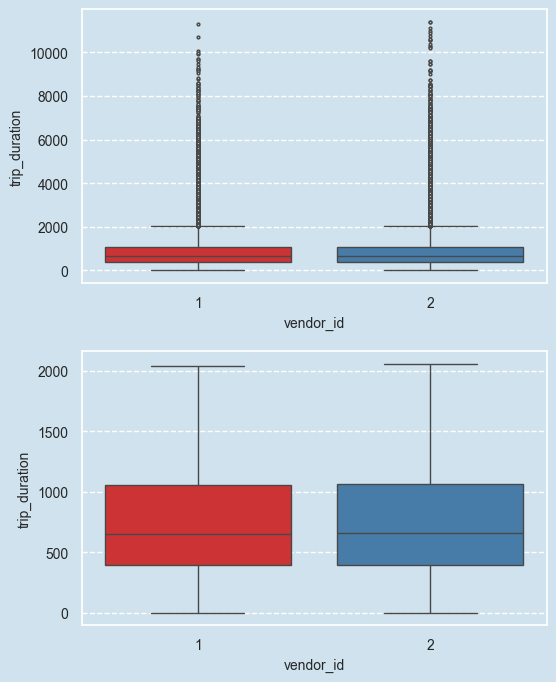

In [284]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(6, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='vendor_id', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Set1")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='vendor_id', y='trip_duration', showfliers = False, palette="Set1")

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

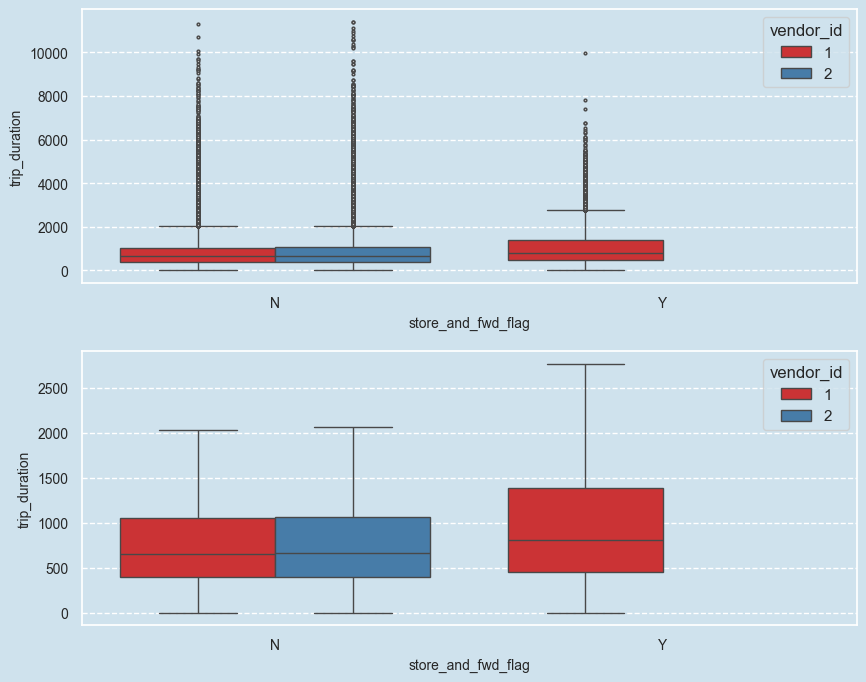

In [285]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='store_and_fwd_flag', y='trip_duration', hue='vendor_id', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Set1")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='store_and_fwd_flag', y='trip_duration', hue='vendor_id', showfliers = False, palette="Set1")

#### Store and forward flag is only recorded for Vendor 1.

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

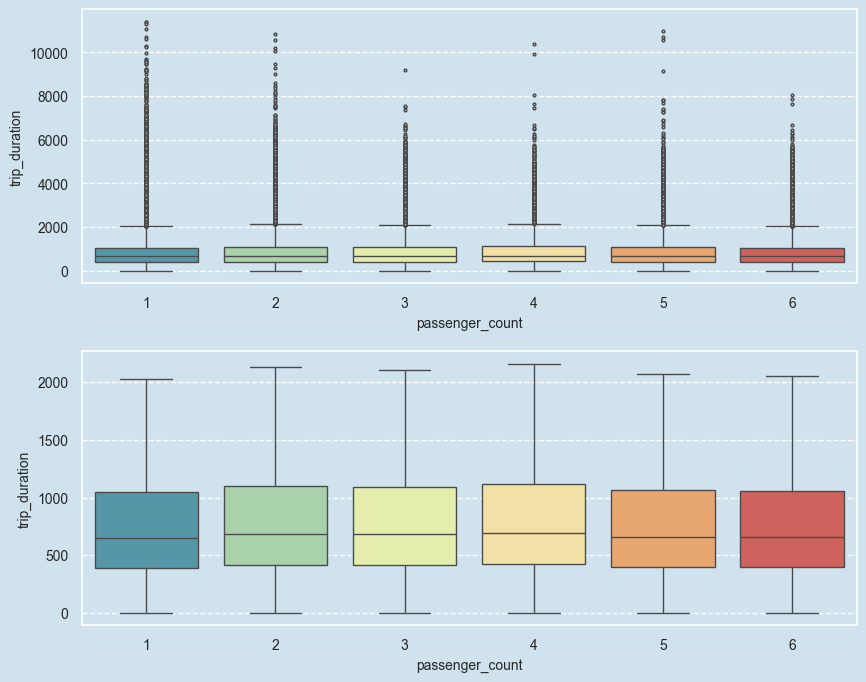

In [286]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.25)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='passenger_count', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='passenger_count', y='trip_duration', showfliers = False, palette="Spectral_r")

<Axes: xlabel='pickup_hour', ylabel='passenger_count'>

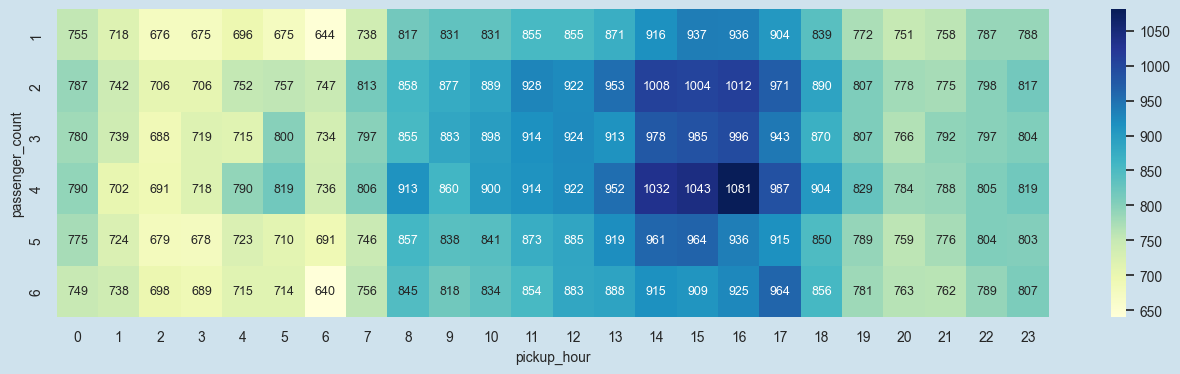

In [287]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

data_pivot = df.pivot_table(index='passenger_count', columns='pickup_hour', values='trip_duration')
data_pivot.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data=data_pivot, square=False, annot=True, annot_kws={'size': 9}, fmt=".0f", cmap="YlGnBu")

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

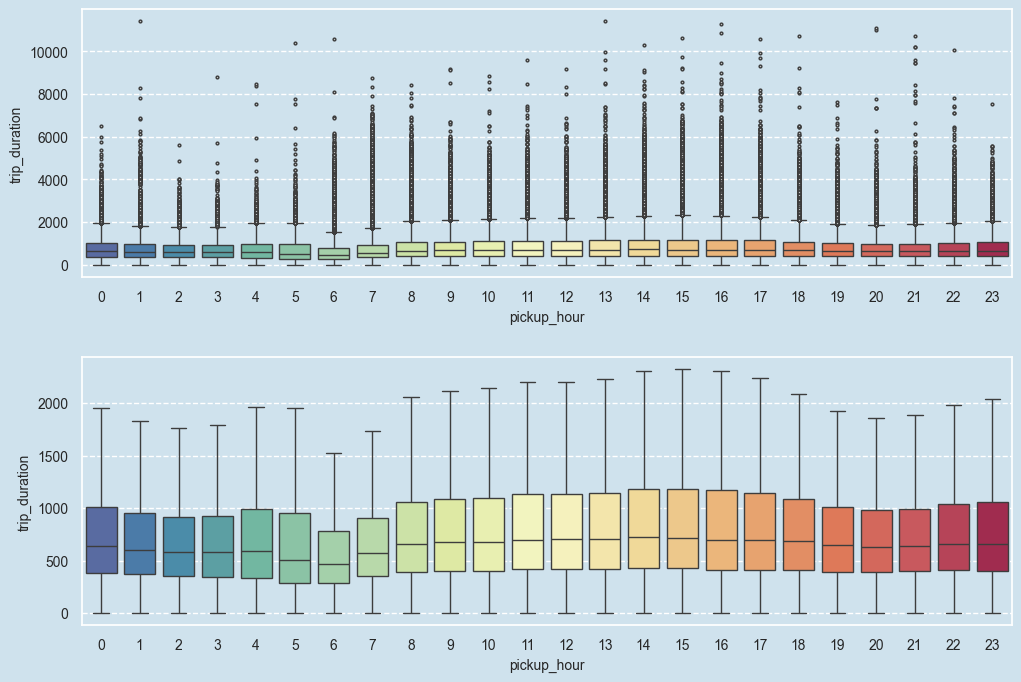

In [288]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(12, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='pickup_hour', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='pickup_hour', y='trip_duration', showfliers=False, palette="Spectral_r")

<Axes: xlabel='pickup_hour', ylabel='pickup_weekday'>

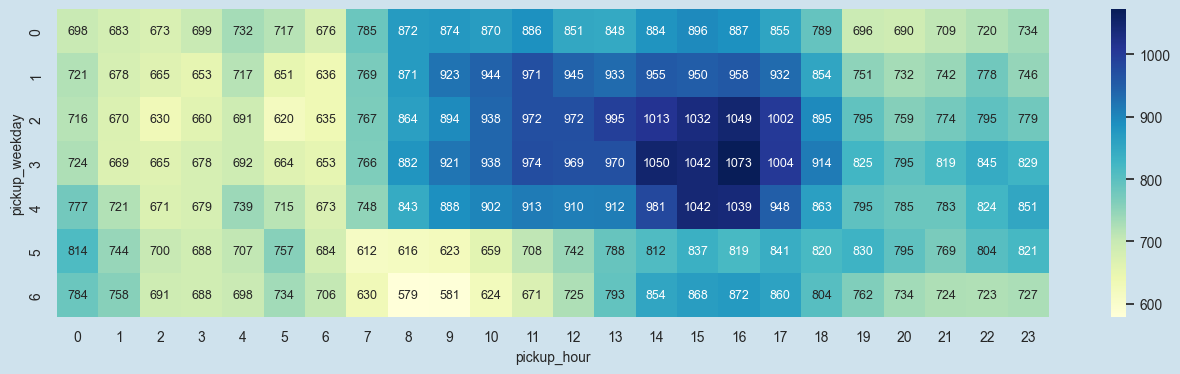

In [289]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

data_pivot = df.pivot_table(index='pickup_weekday', columns='pickup_hour', values='trip_duration')
data_pivot.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data=data_pivot, square=False, annot=True, annot_kws={'size': 9}, fmt=".0f", cmap="YlGnBu")

<Axes: xlabel='pickup_day', ylabel='trip_duration'>

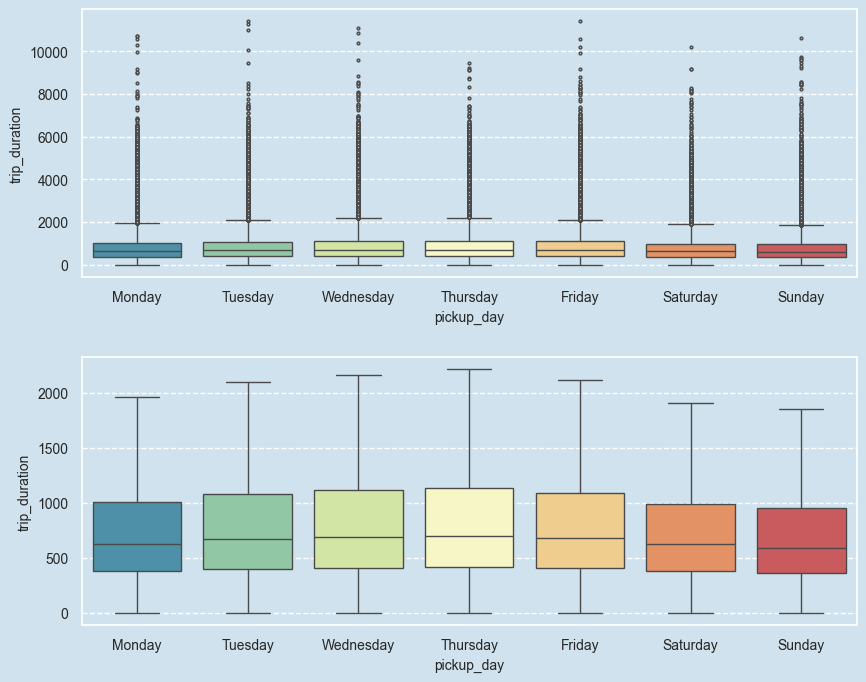

In [290]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='pickup_day', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), order=order, palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='pickup_day', y='trip_duration', showfliers=False, order=order, palette="Spectral_r")

<Axes: xlabel='pickup_month', ylabel='trip_duration'>

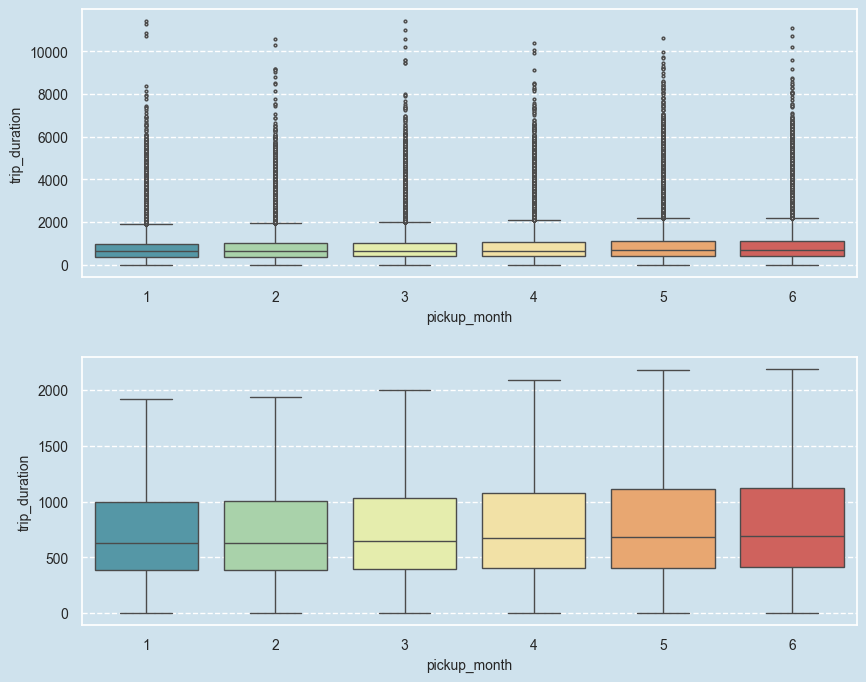

In [291]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='pickup_month', y='trip_duration', flierprops=dict(markerfacecolor='0.75', markersize=2), palette="Spectral_r")

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='pickup_month', y='trip_duration', showfliers=False, palette="Spectral_r")

<Axes: xlabel='pickup_hour', ylabel='pickup_month'>

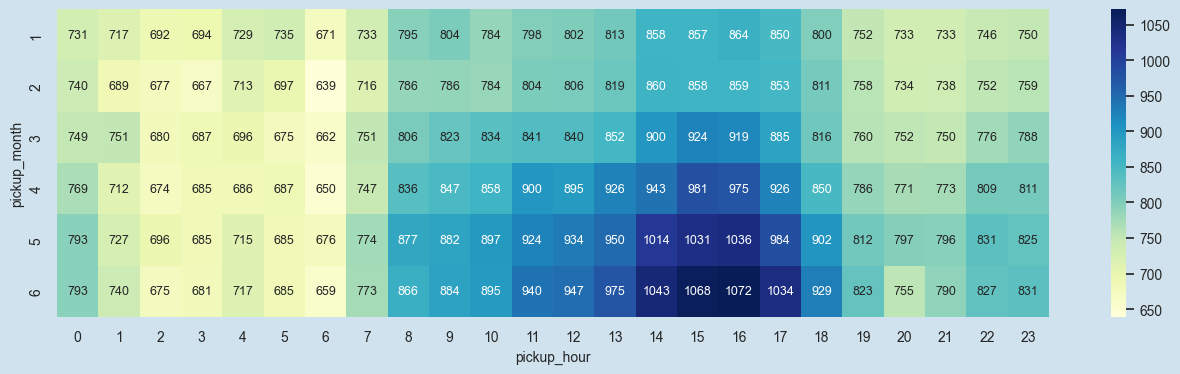

In [292]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

data_pivot = df.pivot_table(index='pickup_month', columns='pickup_hour', values='trip_duration')
data_pivot.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data=data_pivot, square=False, annot=True, annot_kws={'size': 9}, fmt=".0f", cmap="YlGnBu")

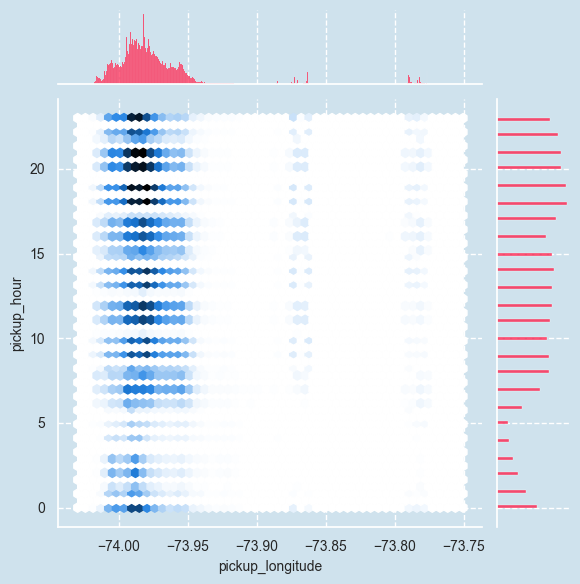

In [293]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_longitude'], y=df['pickup_hour'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

#### Three distinctive areas: Manhattan, JFK and LaGuardia.

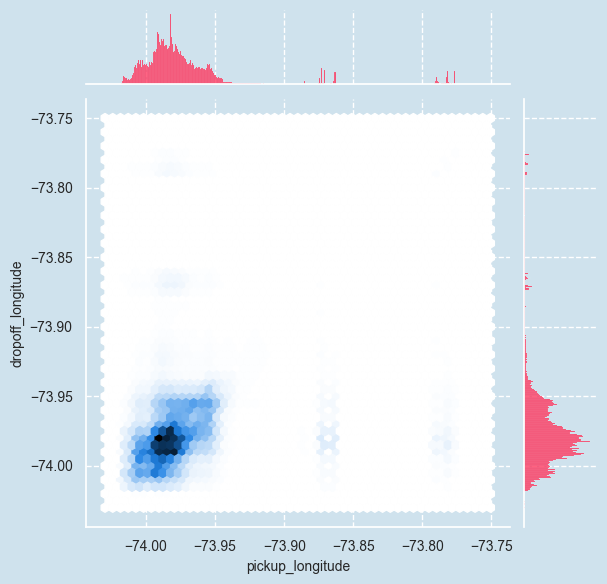

In [294]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_longitude'], y=df['dropoff_longitude'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

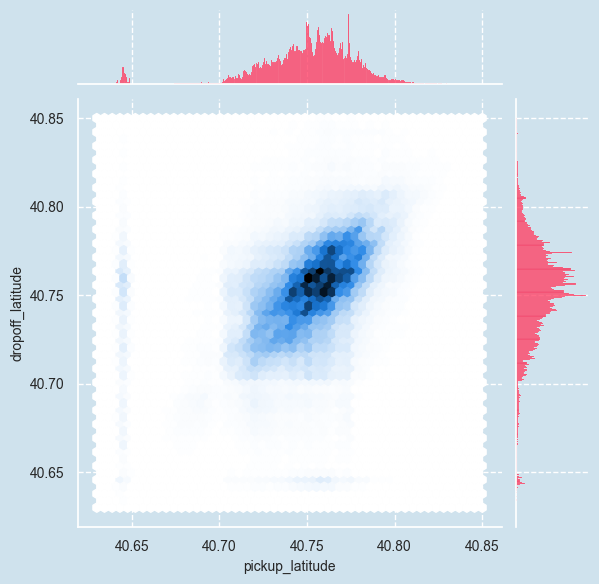

In [295]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_latitude'], y=df['dropoff_latitude'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

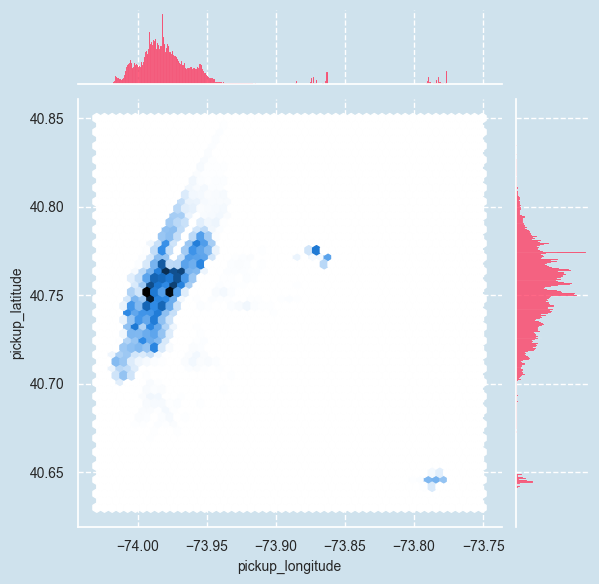

In [296]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['pickup_longitude'], y=df['pickup_latitude'], kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

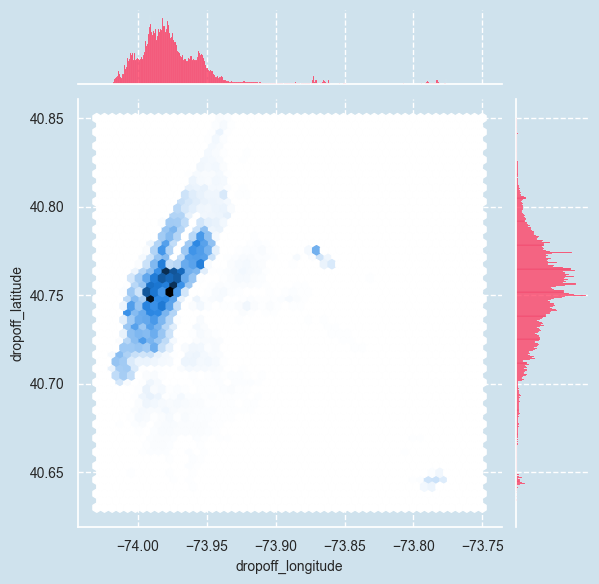

In [297]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['dropoff_longitude'], y=df['dropoff_latitude'],  kind='hex', marginal_kws={'color': "#ff1744"}, color="#1976d2")

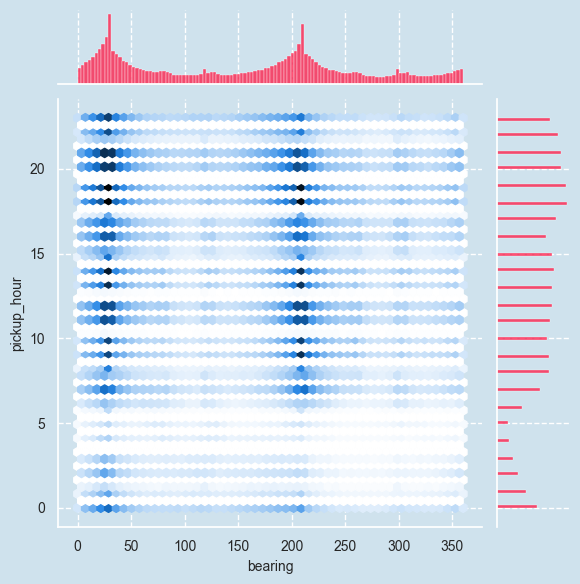

In [298]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['bearing'], y=df['pickup_hour'], kind="hex", marginal_kws={'color': "#ff1744"}, color="#1976d2")

#### - We can see two distinctive bearing angles, at about 25 and 210 degrees.
#### - These angles are inline with Manhattan's North-East and South-West directions, where the most traffic is occuring.

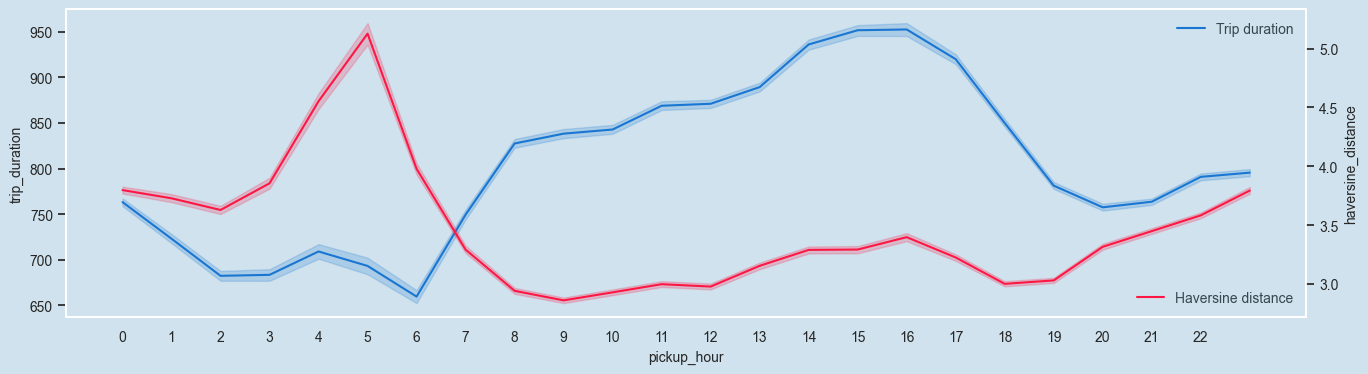

In [299]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':False, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(16, 4), 'grid.linestyle': '--'})

ax = sns.lineplot(data=df, x='pickup_hour', y='trip_duration', color="#1976d2")

ax.legend(["Trip duration"], loc='upper right', facecolor='#cfe2ed', edgecolor='white', fontsize=10, labelcolor='#37474F', frameon=False)
ax2 = ax.twinx()
sns.lineplot(data=df, x='pickup_hour', y='haversine_distance', color="#ff1744", ax=ax2)
ax2.legend(["Haversine distance"], loc='lower right', facecolor='#cfe2ed', edgecolor='white', fontsize=10, labelcolor='#37474F', frameon=False)
plt.xticks(np.arange(df['pickup_hour'].min(), df['pickup_hour'].max(), 1.0))
plt.show()

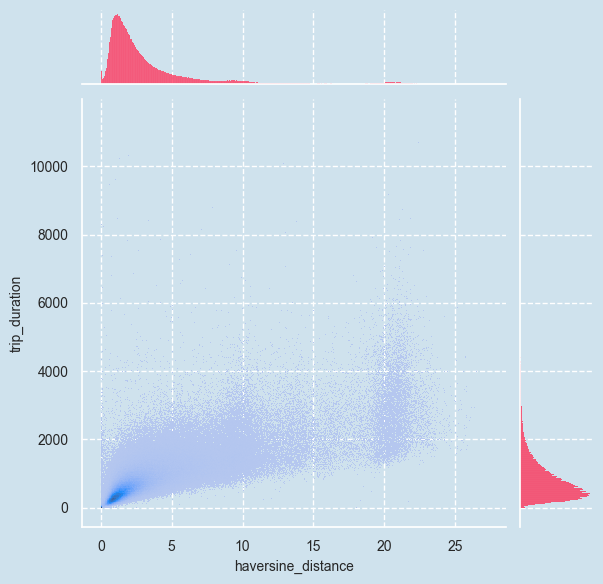

In [300]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

sns.jointplot(data=df, x=df['haversine_distance'], y=df['trip_duration'], kind="hist", marginal_kws={'color': "#ff1744"}, color="#1976d2")

## EDA Multivariable Analysis

In [301]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numeric)
df_numeric.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_weekday,pickup_hour,pickup_month,haversine_distance,manhattan_distance,pickup_r,pickup_phi,dropoff_r,dropoff_phi,bearing
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,17,3,1.500199,1.737377,1.474301,-1.067147,1.474013,-1.067071,99.970196
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,0,6,1.807530,2.433229,1.474027,-1.067441,1.474256,-1.067627,242.846232
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,11,1,6.392251,8.212765,1.474219,-1.067170,1.474168,-1.067879,200.319835
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,2,19,4,1.487163,1.663192,1.474323,-1.067803,1.474246,-1.067953,187.262300
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,5,13,3,1.189920,1.200800,1.474374,-1.066833,1.474282,-1.066943,179.473585


<Axes: >

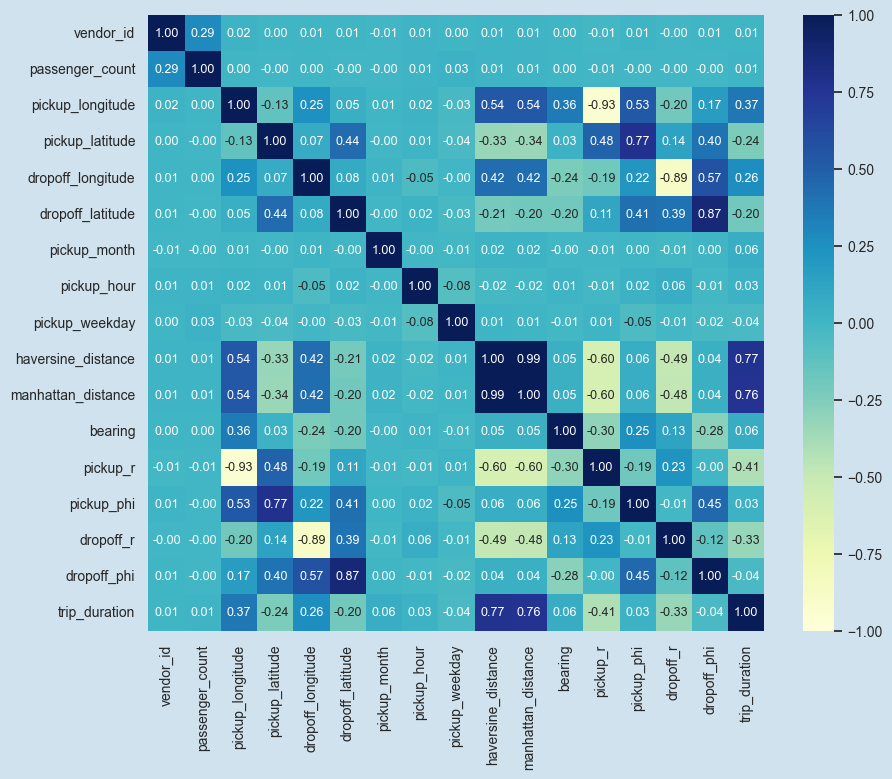

In [302]:
sns.set(rc={'axes.facecolor':'#cfe2ed', 'figure.facecolor':'#cfe2ed', 'font.style':'normal', 'axes.edgecolor': 'white', 'axes.titlesize':10, 'axes.grid':True, 'axes.titlesize': 12, 'axes.labelsize':10,
            'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(10, 8), 'grid.linestyle': '--'})

features_target = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                   'pickup_month', 'pickup_hour', 'pickup_weekday',  'haversine_distance', 'manhattan_distance', 'bearing',
                   'pickup_r', 'pickup_phi', 'dropoff_r', 'dropoff_phi', 'trip_duration']
sns.heatmap(data=df[features_target].corr(), square=True, annot=True, annot_kws={'size': 9}, fmt=".2f", vmin=-1, vmax=1, cmap="YlGnBu")